In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
google_path = "drive/MyDrive/si671-hyfrankl-uvuuview/"
user = pd.read_json(google_path+"cleaned_user.json")

In [4]:
user['friends'] = user['friend_id'].apply(lambda row: len(set(row)))
user['elite'] = user['elite'].apply(lambda row: len(set(row.split(','))) if row else 0)
user.drop(columns=['Unnamed: 0', 'name', 'yelping_since', 'friend_id', 'id'], inplace=True)

In [5]:
user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'funny', 'review_count', 'useful', 'friends'],
      dtype='object')

In [6]:
X = user.drop(columns=['fans'])
y = user['fans']

In [7]:
comatrix = X.corrwith(y)
comatrix.sort_values(ascending=False)

friends               0.636271
useful                0.623741
cool                  0.587613
funny                 0.579509
compliment_plain      0.524332
review_count          0.522714
compliment_cool       0.479696
compliment_funny      0.479696
compliment_writer     0.444907
compliment_hot        0.423731
elite                 0.359589
compliment_note       0.309599
compliment_photos     0.292433
compliment_more       0.245133
compliment_profile    0.200126
compliment_cute       0.194682
compliment_list       0.118873
average_stars         0.021603
dtype: float64

In [8]:
import seaborn as sns
import numpy as np
# from scipy.stats import skew

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.decomposition import TruncatedSVD

In [11]:
features = list(comatrix[comatrix > 0.3].index.values)
X_sub = X[features]
print(features)

['compliment_cool', 'compliment_funny', 'compliment_hot', 'compliment_note', 'compliment_plain', 'compliment_writer', 'cool', 'elite', 'funny', 'review_count', 'useful', 'friends']


In [12]:
svd_test = TruncatedSVD(n_components=10)
scalar_test = StandardScaler()

x_scaled = scalar_test.fit_transform(X_sub)
x_svd = svd_test.fit_transform(x_scaled)
print(np.cumsum(svd_test.explained_variance_ratio_))

[0.62039388 0.75691758 0.83105319 0.88553381 0.93385762 0.95600804
 0.97758482 0.99119436 0.9964745  0.9997943 ]


In [13]:

# regressor = RidgeCV()

In [15]:
regressor = RandomForestRegressor(max_depth=8)
pipe = Pipeline([('regression', regressor)])

scores = cross_validate(
    estimator=pipe, 
    X=X, y=y, cv=5,
    scoring="r2",
    return_train_score=True,
    return_estimator=True,
)
print(pd.DataFrame(scores))

    fit_time  score_time                                          estimator  \
0  20.683505    0.125768  ((DecisionTreeRegressor(max_depth=8, max_featu...   
1  20.899014    0.123958  ((DecisionTreeRegressor(max_depth=8, max_featu...   
2  22.355283    0.113415  ((DecisionTreeRegressor(max_depth=8, max_featu...   
3  21.573828    0.110070  ((DecisionTreeRegressor(max_depth=8, max_featu...   
4  22.004224    0.105473  ((DecisionTreeRegressor(max_depth=8, max_featu...   

   test_score  train_score  
0    0.458690     0.936207  
1    0.725056     0.874817  
2    0.769773     0.907502  
3    0.795246     0.917883  
4    0.826983     0.920525  


In [16]:
regressor = RidgeCV()
xScalar = StandardScaler()
svd = TruncatedSVD(n_components=6)
pipe = Pipeline([('scaler', xScalar), ('svd', svd), ('regression', regressor)])

scores_ridge = cross_validate(
    estimator=pipe, 
    X=X, y=y, cv=5,
    scoring="r2",
    return_train_score=True,
    return_estimator=True,
)
print(pd.DataFrame(scores_ridge))

   fit_time  score_time                                          estimator  \
0  0.509186    0.024983  (StandardScaler(), TruncatedSVD(n_components=6...   
1  0.477288    0.018442  (StandardScaler(), TruncatedSVD(n_components=6...   
2  0.461457    0.008580  (StandardScaler(), TruncatedSVD(n_components=6...   
3  0.527980    0.008556  (StandardScaler(), TruncatedSVD(n_components=6...   
4  0.488727    0.015042  (StandardScaler(), TruncatedSVD(n_components=6...   

   test_score  train_score  
0    0.412241     0.695679  
1    0.716323     0.488309  
2    0.703222     0.539292  
3    0.551752     0.551952  
4    0.529958     0.551770  


In [17]:
from pandas.core.common import random_state
regressor = MLPRegressor((32, 16), learning_rate_init=1e-2)
xScalar = StandardScaler()
svd = TruncatedSVD(n_components=6)
pipe = Pipeline([('scaler', xScalar), ('svd', svd), ('regression', regressor)])

scores_mlp = cross_validate(
    estimator=pipe, 
    X=X, y=y, cv=5,
    scoring="r2",
    return_train_score=True,
    return_estimator=True,
)
print(pd.DataFrame(scores_mlp))

    fit_time  score_time                                          estimator  \
0  17.439069    0.016548  (StandardScaler(), TruncatedSVD(n_components=6...   
1  32.888902    0.028420  (StandardScaler(), TruncatedSVD(n_components=6...   
2   9.761894    0.023507  (StandardScaler(), TruncatedSVD(n_components=6...   
3  11.481754    0.015970  (StandardScaler(), TruncatedSVD(n_components=6...   
4  31.159069    0.023303  (StandardScaler(), TruncatedSVD(n_components=6...   

   test_score  train_score  
0    0.491218     0.809139  
1    0.722967     0.886937  
2    0.807171     0.655804  
3    0.777215     0.674428  
4    0.768846     0.668976  


In [23]:
dataframes = [scores, scores_ridge, scores_mlp]
names = ['randomForest', 'ridge', 'mlp']

results = {}

for name, df in zip(names, dataframes):
    results[name] = {"train": df['train_score'].mean(), "test": df['test_score'].mean()}
    print(f"{name}: train -- {results[name]['train']}, test -- {results[name]['test']}")


randomForest: train -- 0.911386697535937, test -- 0.7151496026325717
ridge: train -- 0.5654001369642045, test -- 0.5826992267021562
mlp: train -- 0.739056816281376, test -- 0.7134830779497812


In [24]:
results

{'randomForest': {'train': 0.911386697535937, 'test': 0.7151496026325717},
 'ridge': {'train': 0.5654001369642045, 'test': 0.5826992267021562},
 'mlp': {'train': 0.739056816281376, 'test': 0.7134830779497812}}

In [32]:
results_df = pd.DataFrame(results).transpose()
results_df

,train,test
randomForest,0.911387,0.715150
ridge,0.565400,0.582699
mlp,0.739057,0.713483


In [34]:
import matplotlib.pyplot as plt

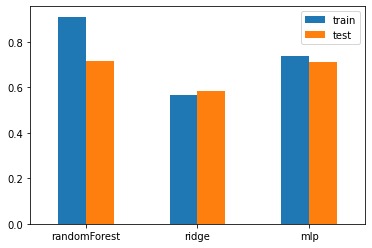

In [41]:
results_df.plot.bar(rot=0)